### explore metar data

#### read and parse data

In [1]:
# read data
pd.set_option('display.max_colwidth', 500)

df = pd.read_csv('data/METAR_2014_2023.csv')
df['date'] = pd.to_datetime(df['date'])
print(df.shape)
df[:3]

(89590, 3)


,airport_id,date,metar
0,KMIA,2014-01-01,KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021 RMK AO2 SLP229 T02330183
1,KMIA,2014-01-01,KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A3021 RMK AO2 SLP231 T02330183
2,KMIA,2014-01-01,KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 A3023 RMK AO2 RAB44 SLP236 P0000 60000 T02280178 51013


In [2]:
# clean from RMK - we don't need
df['metar'] = df['metar'].map(lambda x: x.split(' RMK')[0].strip().replace('SPECI ',''))
df = df[df.metar.str[:4].isin(['KMIA','SPEC'])].reset_index(drop = True)
print(df.shape)
df[:5]

(89585, 3)


,airport_id,date,metar
0,KMIA,2014-01-01,KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021
1,KMIA,2014-01-01,KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A3021
2,KMIA,2014-01-01,KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 A3023
3,KMIA,2014-01-01,KMIA 010353Z 07010KT 10SM OVC028 23/17 A3021
4,KMIA,2014-01-01,KMIA 010453Z 07010KT 10SM OVC028 24/18 A3019


In [3]:
# parsing
from metar import Metar
num_err = 0
def parse_metar(x):
    try:
        m = Metar.Metar(x.metar, month = x.date.month, year = x.date.year)
    except Exception as e:
        m = Metar.Metar(x.metar[:4], month = x.date.month, year = x.date.year)
        print(e)
        global num_err
        num_err+=1
    return m

In [4]:
x = df.iloc[-1,:]
m = parse_metar(x)
m

In [5]:
out = df.apply(parse_metar, axis = 1)

Unparsed groups in body: 350/08KT
Unparsed groups in body: <P
Unparsed groups in body: 06003KT
Unparsed groups in body: 02007KTKT
Unparsed groups in body: SCT0
Unparsed groups in body: SCT150 BKN250 30/23
Unparsed groups in body: VRB03KT
Unparsed groups in body: 02007KT


In [6]:
print(num_err)

8


In [7]:
df_out = pd.DataFrame([x.__dict__ for x in out])
print(df_out.shape)
df_out[:3]

(89585, 48)


,code,type,mod,station_id,time,cycle,wind_dir,wind_speed,wind_gust,wind_dir_from,wind_dir_to,vis,vis_dir,max_vis,max_vis_dir,temp,dewpt,press,runway,weather,recent,sky,windshear,wind_speed_peak,wind_dir_peak,peak_wind_time,wind_shift_time,max_temp_6hr,min_temp_6hr,max_temp_24hr,min_temp_24hr,press_sea_level,precip_1hr,precip_3hr,precip_6hr,precip_24hr,_trend,_trend_groups,_remarks,_unparsed_groups,_unparsed_remarks,_now,_utcdelta,_month,_year,_day,_hour,_min
0,KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021,METAR,AUTO,KMIA,2014-01-01 00:53:00,1.00,40 degrees,9 knots,15 knots,None,None,10 miles,None,None,None,23.0 C,18.0 C,30.21 inches,[],[],[],"[(OVC, 2500 feet, None)]",[],None,None,None,None,None,None,None,None,None,None,None,None,None,False,[],[],[],[],2024-02-15 20:48:40.470140,0 days 03:00:00,1,2014,1.00,0.00,53.00
1,KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A3021,METAR,AUTO,KMIA,2014-01-01 01:53:00,2.00,40 degrees,9 knots,15 knots,None,None,10 miles,None,None,None,23.0 C,18.0 C,30.21 inches,[],[],[],"[(OVC, 2300 feet, None)]",[],None,None,None,None,None,None,None,None,None,None,None,None,None,False,[],[],[],[],2024-02-15 20:48:40.470140,0 days 03:00:00,1,2014,1.00,1.00,53.00
2,KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 A3023,METAR,AUTO,KMIA,2014-01-01 02:53:00,3.00,50 degrees,9 knots,19 knots,None,None,10 miles,None,None,None,23.0 C,18.0 C,30.23 inches,[],"[(-, None, RA, None, None)]",[],"[(OVC, 2500 feet, None)]",[],None,None,None,None,None,None,None,None,None,None,None,None,None,False,[],[],[],[],2024-02-15 20:48:40.470140,0 days 03:00:00,1,2014,1.00,2.00,53.00


In [8]:
feats = df_out.count()
feats

code                 89585
type                 89585
mod                  89585
station_id           89585
time                 89577
cycle                89577
wind_dir             85391
wind_speed           89441
wind_gust            12918
wind_dir_from         1391
wind_dir_to           1391
vis                  89547
vis_dir                  0
max_vis                  0
max_vis_dir              0
temp                 89519
dewpt                89515
press                89570
runway               89585
weather              89585
recent               89585
sky                  89585
windshear            89585
wind_speed_peak          0
wind_dir_peak            0
peak_wind_time           0
wind_shift_time          0
max_temp_6hr             0
min_temp_6hr             0
max_temp_24hr            0
min_temp_24hr            0
press_sea_level          0
precip_1hr               0
precip_3hr               0
precip_6hr               0
precip_24hr              0
_trend               89585
_

In [9]:
f1 = feats > 10000
f2 = feats.index.str[0] != '_'
feats_used = list(feats[f1&f2].index)
feats_used = [f for f in feats_used if f not in ['type','mod','station_id','cycle']]
feats_used

['code',
 'time',
 'wind_dir',
 'wind_speed',
 'wind_gust',
 'vis',
 'temp',
 'dewpt',
 'press',
 'runway',
 'weather',
 'recent',
 'sky',
 'windshear']

In [10]:
df_out2 = df_out[feats_used]
df_out2

,code,time,wind_dir,wind_speed,wind_gust,vis,temp,dewpt,press,runway,weather,recent,sky,windshear
0,KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021,2014-01-01 00:53:00,40 degrees,9 knots,15 knots,10 miles,23.0 C,18.0 C,30.21 inches,[],[],[],"[(OVC, 2500 feet, None)]",[]
1,KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A3021,2014-01-01 01:53:00,40 degrees,9 knots,15 knots,10 miles,23.0 C,18.0 C,30.21 inches,[],[],[],"[(OVC, 2300 feet, None)]",[]
2,KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 A3023,2014-01-01 02:53:00,50 degrees,9 knots,19 knots,10 miles,23.0 C,18.0 C,30.23 inches,[],"[(-, None, RA, None, None)]",[],"[(OVC, 2500 feet, None)]",[]
3,KMIA 010353Z 07010KT 10SM OVC028 23/17 A3021,2014-01-01 03:53:00,70 degrees,10 knots,None,10 miles,23.0 C,17.0 C,30.21 inches,[],[],[],"[(OVC, 2800 feet, None)]",[]
4,KMIA 010453Z 07010KT 10SM OVC028 24/18 A3019,2014-01-01 04:53:00,70 degrees,10 knots,None,10 miles,24.0 C,18.0 C,30.19 inches,[],[],[],"[(OVC, 2800 feet, None)]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89580,KMIA 311953Z 28004KT 10SM FEW250 21/08 A3019,2023-12-31 19:53:00,280 degrees,4 knots,None,10 miles,21.0 C,8.0 C,30.19 inches,[],[],[],"[(FEW, 25000 feet, None)]",[]
89581,KMIA 312053Z 31005KT 10SM FEW250 21/09 A3019,2023-12-31 20:53:00,310 degrees,5 knots,None,10 miles,21.0 C,9.0 C,30.19 inches,[],[],[],"[(FEW, 25000 feet, None)]",[]
89582,KMIA 312153Z 29004KT 10SM FEW250 21/08 A3019,2023-12-31 21:53:00,290 degrees,4 knots,None,10 miles,21.0 C,8.0 C,30.19 inches,[],[],[],"[(FEW, 25000 feet, None)]",[]
89583,KMIA 312253Z 29004KT 10SM CLR 19/09 A3021,2023-12-31 22:53:00,290 degrees,4 knots,None,10 miles,19.0 C,9.0 C,30.21 inches,[],[],[],"[(CLR, None, None)]",[]


In [11]:
df_out2.dtypes

code                  object
time          datetime64[ns]
wind_dir              object
wind_speed            object
wind_gust             object
vis                   object
temp                  object
dewpt                 object
press                 object
runway                object
weather               object
recent                object
sky                   object
windshear             object
dtype: object

#### time

In [12]:
df_out2.time.nunique()

89577

In [13]:
df_out2.time.count()

89577

In [14]:
df_out2.shape

(89585, 14)

In [15]:
f1 = df_out2.time.isnull()
df_out2 = df_out2[~f1].sort_values('time').reset_index()
del df_out2['index']

<Axes: xlabel='time'>

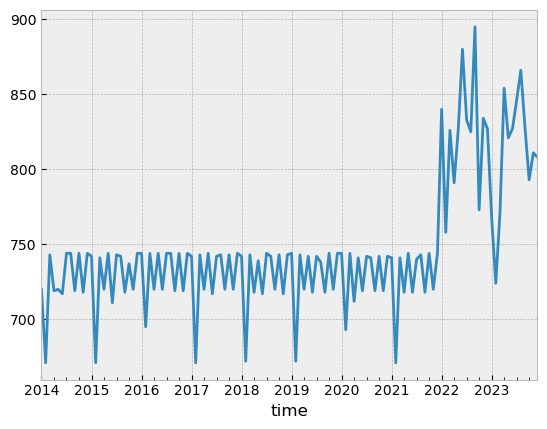

In [16]:
# number of rows per month
df_out2.set_index(['time']).resample('M').size()[-200:].plot()

In [17]:
# several rows per hour starting from 2022
x = df_out2.set_index(['time']).resample('H').size()
x[x > 1]

time
2022-01-03 19:00:00    2
2022-01-05 13:00:00    3
2022-01-05 14:00:00    2
2022-01-05 15:00:00    2
2022-01-05 16:00:00    2
                      ..
2023-12-27 07:00:00    3
2023-12-27 08:00:00    2
2023-12-27 09:00:00    2
2023-12-27 10:00:00    3
2023-12-28 15:00:00    3
Length: 1521, dtype: int64

In [18]:
df_out2['time_diff'] = df_out2.time.diff().dt.total_seconds().values/3600

In [19]:
print(df_out2.shape)
df_out2 = df_out2.set_index('time').resample('H').last()
print(df_out2.shape)

(89577, 15)
(87648, 14)


In [20]:
x = df_out2['time_diff'].value_counts()
x[x.index >= 2].sort_index()

time_diff
2.00     119
2.30       1
3.00      11
4.00       4
5.00       1
6.00       1
7.00       1
19.00      1
25.00      2
Name: count, dtype: int64

In [21]:
df_out2.count()

code          87408
wind_dir      83467
wind_speed    87279
wind_gust     12589
vis           87378
temp          87351
dewpt         87347
press         87401
runway        87408
weather       87408
recent        87408
sky           87408
windshear     87408
time_diff     87407
dtype: int64

In [22]:
# missings view
f1 = df_out2.code.isnull()
df_out3 = df_out2[f1]
df_out3['time_diff'] = df_out3.reset_index().time.diff().dt.total_seconds().values/3600

print(df_out3.shape)
# df_out3

(240, 14)


In [23]:
df_out2 = df_out2[~f1]

#### value counts

In [24]:
# let's make a id of measure
df_out2['id1'] = range(len(df_out2))

In [25]:
df_out2['runway'].map(len).value_counts()

runway
0    86870
1      538
Name: count, dtype: int64

In [26]:
df_out2['weather'].map(len).value_counts()

weather
0    81461
1     4850
2     1085
3       12
Name: count, dtype: int64

In [27]:
df_out2['recent'].map(len).value_counts()

recent
0    87408
Name: count, dtype: int64

In [28]:
df_out2['windshear'].map(len).value_counts()

windshear
0    87408
Name: count, dtype: int64

In [29]:
df_out2['sky'].map(len).value_counts()

sky
2    29096
3    26226
1    22449
4     9297
5      299
0       40
6        1
Name: count, dtype: int64

In [30]:
del df_out2['recent']
del df_out2['windshear']

In [31]:
df_out2.count()

code          87408
wind_dir      83467
wind_speed    87279
wind_gust     12589
vis           87378
temp          87351
dewpt         87347
press         87401
runway        87408
weather       87408
sky           87408
time_diff     87407
id1           87408
dtype: int64

#### numeric feats

In [32]:
# get values
def conv_val(x):
    try:
        return x.value()
    except:
        return np.nan
    
# get string
def conv_str(x):
    try:
        return x.string()
    except:
        return np.nan

# get measure
def conv_msr(x):
    try:
        return re.split('[0-9]+', x.string())[-1].strip()
        # return x.string().split(' ')[1]
    except:
        return np.nan

##### wind

wind_dir
degrees    85391
Name: count, dtype: int64

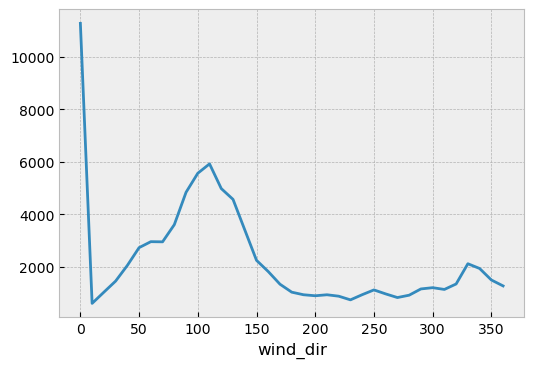

In [33]:
df_out['wind_dir'].map(conv_val).value_counts().sort_index().plot(figsize = (6,4))
df_out['wind_dir'].map(conv_msr).value_counts()

wind_speed
knots    89440
mps          1
Name: count, dtype: int64

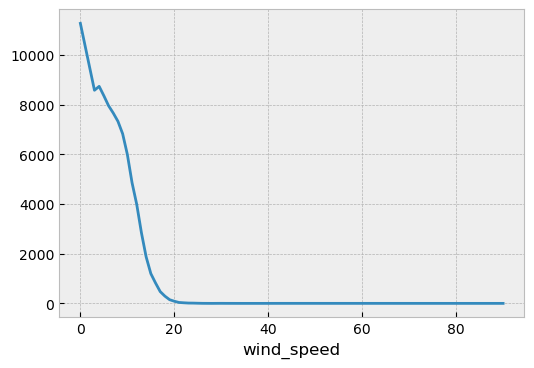

In [34]:
df_out['wind_speed'].map(conv_val).value_counts().sort_index().plot(figsize = (6,4))
df_out['wind_speed'].map(conv_msr).value_counts()

wind_gust
knots    12918
Name: count, dtype: int64

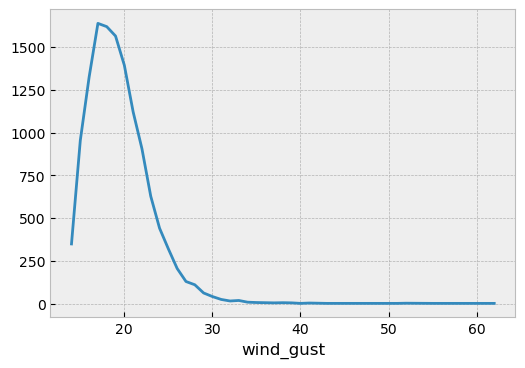

In [35]:
df_out['wind_gust'].map(conv_val).value_counts().sort_index().plot(figsize = (6,4))
df_out['wind_gust'].map(conv_msr).value_counts()

In [36]:
# error in measure
f1 = df_out2['wind_speed'].map(conv_msr) == 'mps'
df_out2[f1]

,code,wind_dir,wind_speed,wind_gust,vis,temp,dewpt,press,runway,weather,sky,time_diff,id1
time,,,,,,,,,,,,,
2014-04-24 16:00:00,KMIA 241653Z VRB03 10SM FEW045 29/16 A3000,None,3 mps,None,10 miles,29.0 C,16.0 C,30.00 inches,[],[],"[(FEW, 4500 feet, None)]",1.00,2701


In [37]:
df_out2['wind_dir'] = df_out2['wind_dir'].map(conv_val)
df_out2['wind_speed'] = df_out2['wind_speed'].map(conv_val)
df_out2['wind_gust'] = df_out2['wind_gust'].map(conv_val)

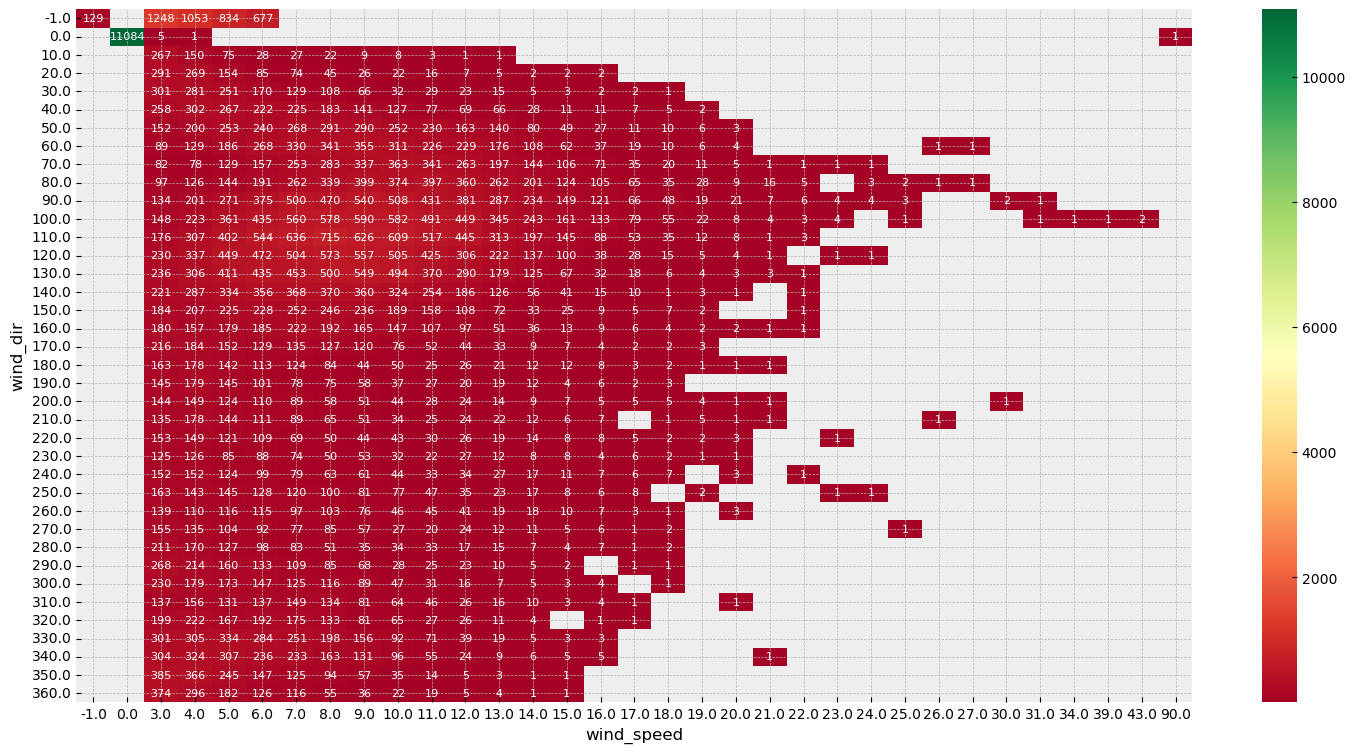

In [38]:
# if wind_dir = 0 then wind_speed = 0
df_corr = df_out2.fillna(-1).groupby(['wind_dir','wind_speed']).size().unstack()

_, ax = plt.subplots(figsize = (18,9))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.0f', annot_kws={"size": 8})

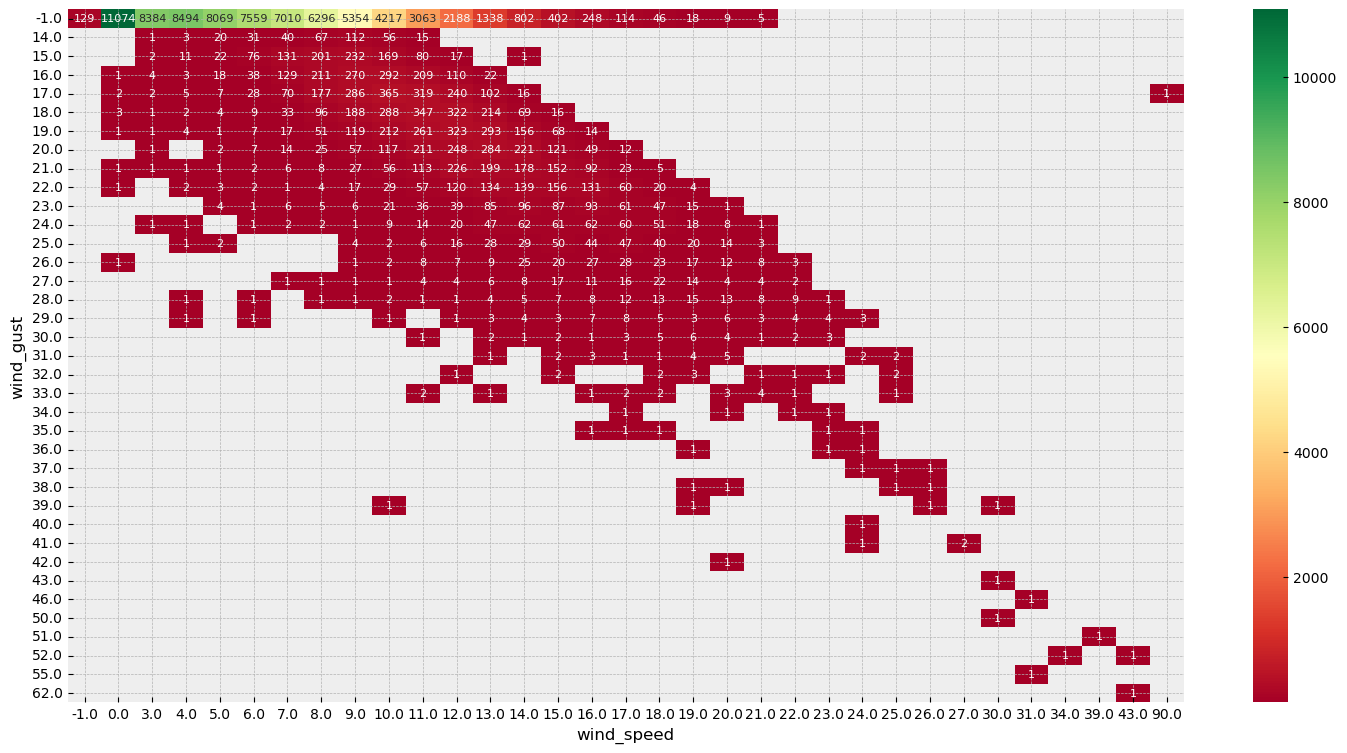

In [39]:
# wind_gust
df_corr = df_out2.fillna(-1).groupby(['wind_gust','wind_speed']).size().unstack()

_, ax = plt.subplots(figsize = (18,9))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.0f', annot_kws={"size": 8})

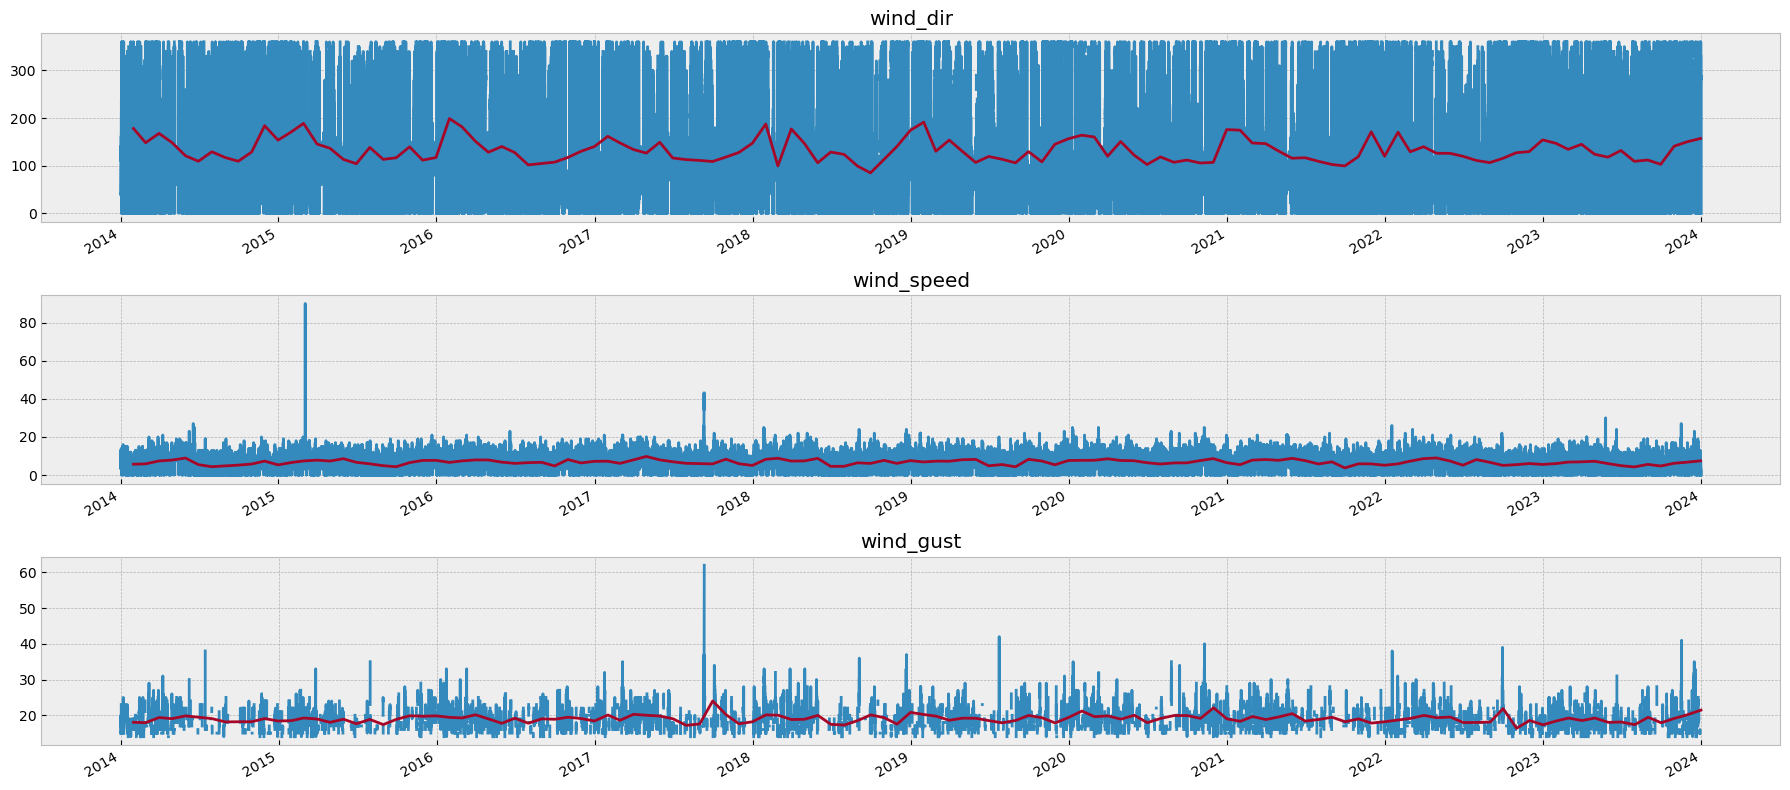

In [40]:
# plotting
i1 = 0
i2 = i1+24*3650

_, ax = plt.subplots(3,1, figsize = (18,8))
_ = df_out2.wind_dir[i1:i2].plot(ax = ax[0], title = 'wind_dir', xlabel = '')
_ = df_out2.wind_dir[i1:i2].resample('M').mean().plot(ax = ax[0], xlabel = '')

_ = df_out2.wind_speed[i1:i2].plot(ax = ax[1], title = 'wind_speed', xlabel = '')
_ = df_out2.wind_speed[i1:i2].resample('M').mean().plot(ax = ax[1], xlabel = '')

_ = df_out2.wind_gust[i1:i2].plot(ax = ax[2], title = 'wind_gust', xlabel = '')
_ = df_out2.wind_gust[i1:i2].resample('M').mean().plot(ax = ax[2], xlabel = '')

plt.tight_layout()

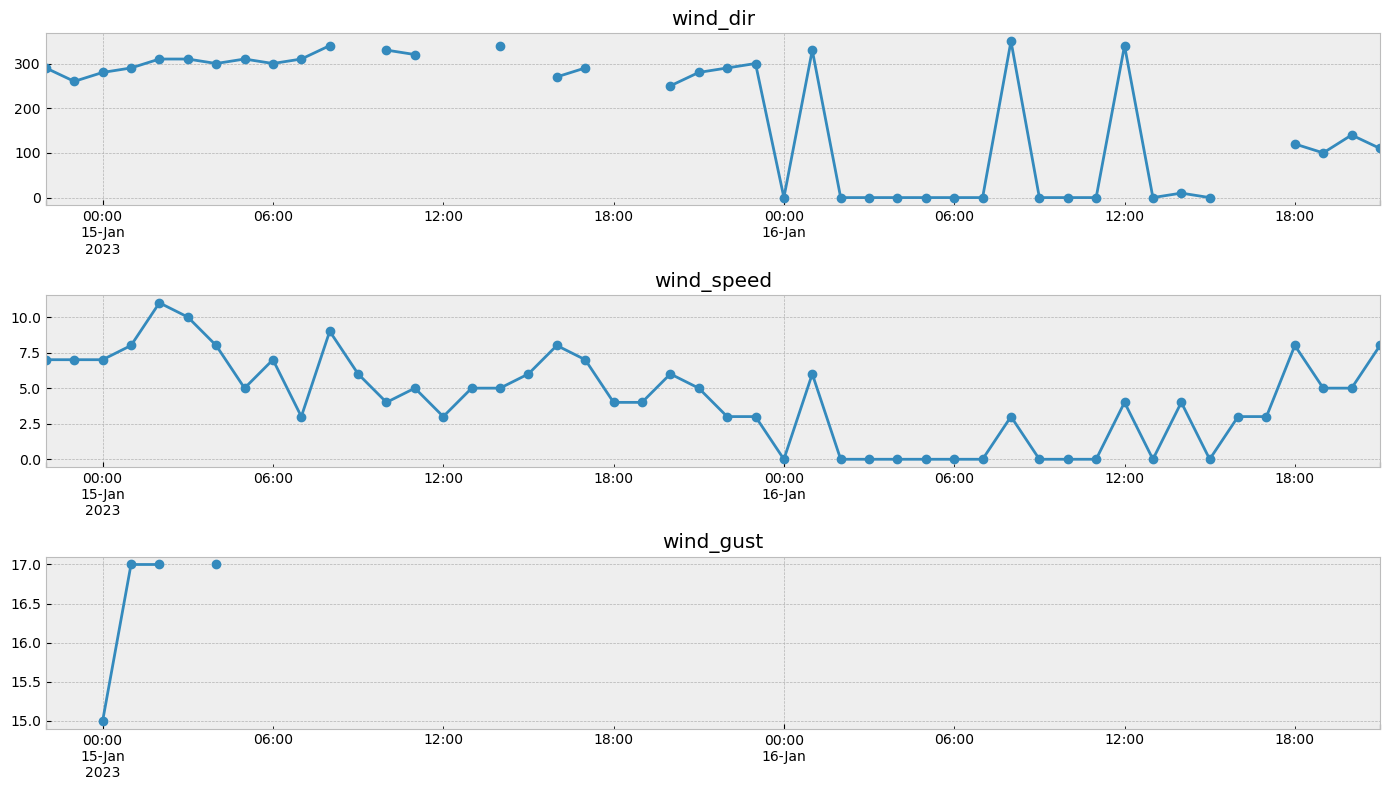

In [41]:
# random plotting
i1 = np.random.randint(0,df_out2.shape[0])
i2 = i1+24*2

_, ax = plt.subplots(3,1, figsize = (14,8))
_ = df_out2.wind_dir[i1:i2].plot(ax = ax[0], title = 'wind_dir', xlabel = '', style = 'o-')
_ = df_out2.wind_speed[i1:i2].plot(ax = ax[1], title = 'wind_speed', xlabel = '', style = 'o-')
_ = df_out2.wind_gust[i1:i2].plot(ax = ax[2], title = 'wind_gust', xlabel = '', style = 'o-')
plt.tight_layout()

In [42]:
df_out2.loc[df_out2['wind_dir'] == 0, 'wind_dir'] = np.nan

In [43]:
df_out2[df_out2['wind_gust'] == 0]

,code,wind_dir,wind_speed,wind_gust,vis,temp,dewpt,press,runway,weather,sky,time_diff,id1
time,,,,,,,,,,,,,


In [44]:
df_out2['wind_diff'] = df_out2['wind_gust'] - df_out2['wind_speed']

In [45]:
# missings stat - we can fill where wind_speed = 0
feats1 = ['wind_speed', 'wind_gust', 'wind_dir']
df_out2[feats1].isnull().groupby(feats1).size()

wind_speed  wind_gust  wind_dir
False       False      False       12497
                       True           92
            True       False       59879
                       True        14811
True        True       True          129
dtype: int64

In [46]:
# 10 mistakes
feats1 = ['wind_speed', 'wind_gust', 'wind_dir']
df_out2[df_out2.wind_speed == 0][feats1].isnull().groupby(feats1).size()

wind_speed  wind_gust  wind_dir
False       False      True           10
            True       True        11074
dtype: int64

In [47]:
df_out2.loc[(df_out2.wind_speed == 0) & (df_out2.wind_gust.notnull()), 'wind_gust'] = np.nan

In [48]:
# stat2
feats1 = ['wind_gust', 'wind_dir']
df_out2[df_out2.wind_speed != 0][feats1].isnull().groupby(feats1).size().unstack()

wind_dir,False,True
wind_gust,,
False,12497,82
True,59879,3866


In [49]:
# view
f1 = df_out2.wind_speed != 0
f2 = df_out2.wind_gust.isnull()
f3 = df_out2.wind_dir.isnull()

for filt in [f1&~f2&f3, f1&f2&f3, f1&~f2&~f3, f1&f2&~f3]:
    df1 = df_out2[filt]
    print(df1.shape)
    display(df1[:3])

(82, 14)


,code,wind_dir,wind_speed,wind_gust,vis,temp,dewpt,press,runway,weather,sky,time_diff,id1,wind_diff
time,,,,,,,,,,,,,,
2014-01-18 16:00:00,KMIA 181653Z VRB06G14KT 10SM FEW030 SCT250 19/10 A3022,NaN,6.00,14.00,10 miles,19.0 C,10.0 C,30.22 inches,[],[],"[(FEW, 3000 feet, None), (SCT, 25000 feet, None)]",1.00,400,8.00
2014-05-17 12:00:00,KMIA 171253Z VRB06G17KT 10SM FEW040 SCT250 23/14 A3010,NaN,6.00,17.00,10 miles,23.0 C,14.0 C,30.10 inches,[],[],"[(FEW, 4000 feet, None), (SCT, 25000 feet, None)]",1.00,3225,11.00
2014-08-10 16:00:00,KMIA 101653Z VRB06G15KT 10SM SCT036 BKN250 32/23 A3007,NaN,6.00,15.00,10 miles,32.0 C,23.0 C,30.07 inches,[],[],"[(SCT, 3600 feet, None), (BKN, 25000 feet, None)]",1.00,5266,9.00


(3866, 14)


,code,wind_dir,wind_speed,wind_gust,vis,temp,dewpt,press,runway,weather,sky,time_diff,id1,wind_diff
time,,,,,,,,,,,,,,
2014-01-02 08:00:00,KMIA 020853Z VRB04KT 10SM CLR 23/21 A3000,NaN,4.00,NaN,10 miles,23.0 C,21.0 C,30.00 inches,[],[],"[(CLR, None, None)]",1.00,32,NaN
2014-01-03 22:00:00,KMIA 032253Z VRB05KT 10SM FEW035 BKN055 BKN170 BKN250 18/11 A3013,NaN,5.00,NaN,10 miles,18.0 C,11.0 C,30.13 inches,[],[],"[(FEW, 3500 feet, None), (BKN, 5500 feet, None), (BKN, 17000 feet, None), (BKN, 25000 feet, None)]",1.00,70,NaN
2014-01-04 12:00:00,KMIA 041253Z VRB04KT 10SM FEW030 OVC050 22/17 A3015,NaN,4.00,NaN,10 miles,22.0 C,17.0 C,30.15 inches,[],[],"[(FEW, 3000 feet, None), (OVC, 5000 feet, None)]",1.00,84,NaN


(12497, 14)


,code,wind_dir,wind_speed,wind_gust,vis,temp,dewpt,press,runway,weather,sky,time_diff,id1,wind_diff
time,,,,,,,,,,,,,,
2014-01-01 00:00:00,KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021,40.00,9.00,15.00,10 miles,23.0 C,18.0 C,30.21 inches,[],[],"[(OVC, 2500 feet, None)]",NaN,0,6.00
2014-01-01 01:00:00,KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A3021,40.00,9.00,15.00,10 miles,23.0 C,18.0 C,30.21 inches,[],[],"[(OVC, 2300 feet, None)]",1.00,1,6.00
2014-01-01 02:00:00,KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 A3023,50.00,9.00,19.00,10 miles,23.0 C,18.0 C,30.23 inches,[],"[(-, None, RA, None, None)]","[(OVC, 2500 feet, None)]",1.00,2,10.00


(59879, 14)


,code,wind_dir,wind_speed,wind_gust,vis,temp,dewpt,press,runway,weather,sky,time_diff,id1,wind_diff
time,,,,,,,,,,,,,,
2014-01-01 03:00:00,KMIA 010353Z 07010KT 10SM OVC028 23/17 A3021,70.00,10.00,NaN,10 miles,23.0 C,17.0 C,30.21 inches,[],[],"[(OVC, 2800 feet, None)]",1.00,3,NaN
2014-01-01 04:00:00,KMIA 010453Z 07010KT 10SM OVC028 24/18 A3019,70.00,10.00,NaN,10 miles,24.0 C,18.0 C,30.19 inches,[],[],"[(OVC, 2800 feet, None)]",1.00,4,NaN
2014-01-01 05:00:00,KMIA 010553Z 06009KT 8SM -RA OVC023 23/19 A3018,60.00,9.00,NaN,8 miles,23.0 C,19.0 C,30.18 inches,[],"[(-, None, RA, None, None)]","[(OVC, 2300 feet, None)]",1.00,5,NaN


##### vis

vis
miles    89547
Name: count, dtype: int64

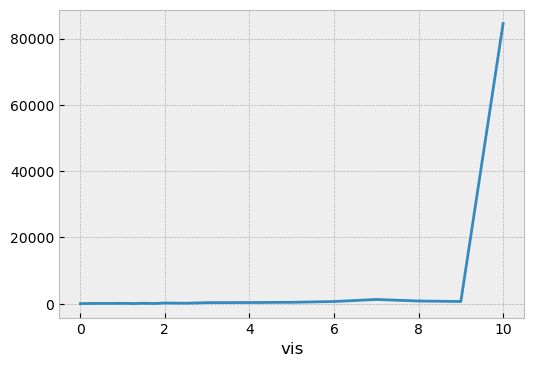

In [50]:
df_out['vis'].map(conv_val).value_counts().sort_index().plot(figsize = (6,4))
df_out['vis'].map(conv_msr).value_counts()

In [51]:
df_out['vis'].map(conv_val).value_counts().sort_index()

vis
0.00         7
0.06        11
0.12         8
0.25        43
0.50        63
0.75        56
1.00        93
1.25        16
1.50       105
1.75        25
2.00       179
2.50       113
3.00       291
4.00       321
5.00       393
6.00       634
7.00      1250
8.00       785
9.00       641
10.00    84513
Name: count, dtype: int64

In [52]:
df_out2['vis'] = df_out2['vis'].map(conv_val)

In [53]:
(df_out2.vis >= 10).sum(), (df_out2.vis < 10).sum()

(83058, 4320)

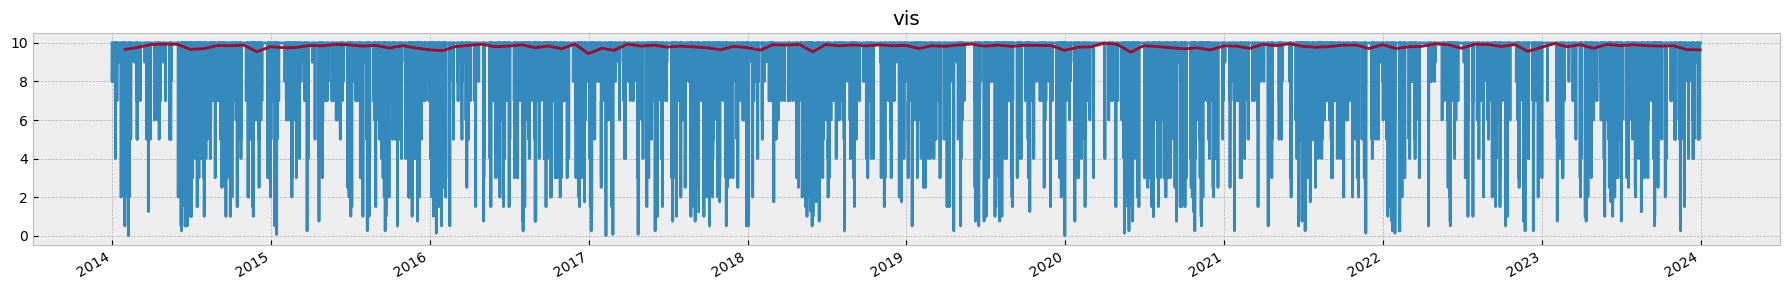

In [54]:
# plotting
i1 = 0
i2 = i1+24*3650

_, ax = plt.subplots(1,1, figsize = (18,3))
_ = df_out2.vis[i1:i2].plot(ax = ax, title = 'vis', xlabel = '')
_ = df_out2.vis[i1:i2].resample('M').mean().plot(ax = ax, xlabel = '')

plt.tight_layout()

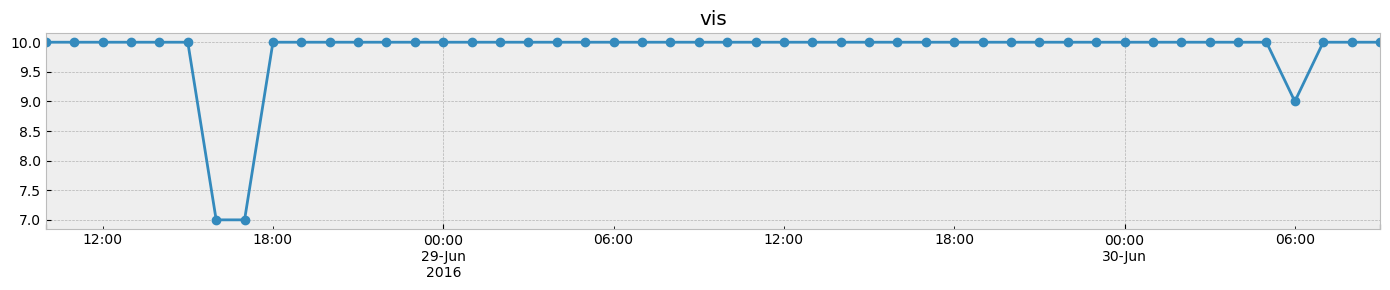

In [55]:
# random plotting
i1 = np.random.randint(0,df_out2.shape[0])
i2 = i1+24*2

_, ax = plt.subplots(1,1, figsize = (14,3))
_ = df_out2.vis[i1:i2].plot(ax = ax, title = 'vis', xlabel = '', style = 'o-')
plt.tight_layout()

##### temp, dewpt, press

temp
C    89519
Name: count, dtype: int64

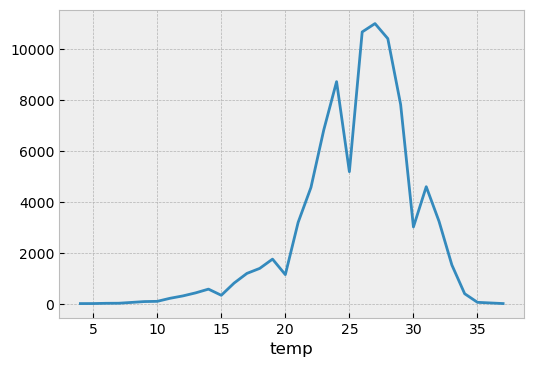

In [56]:
df_out['temp'].map(conv_val).value_counts().sort_index().plot(figsize = (6,4))
df_out['temp'].map(conv_msr).value_counts()

dewpt
C    89515
Name: count, dtype: int64

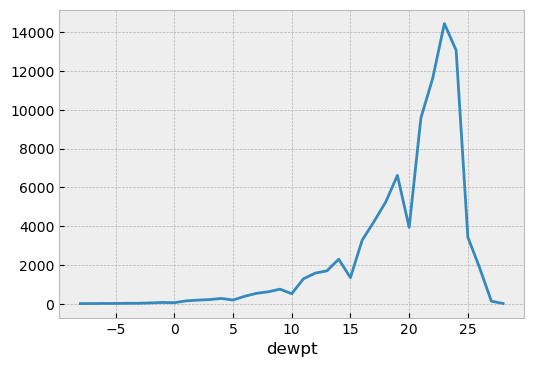

In [57]:
df_out['dewpt'].map(conv_val).value_counts().sort_index().plot(figsize = (6,4))
df_out['dewpt'].map(conv_msr).value_counts()

press
inches    89570
Name: count, dtype: int64

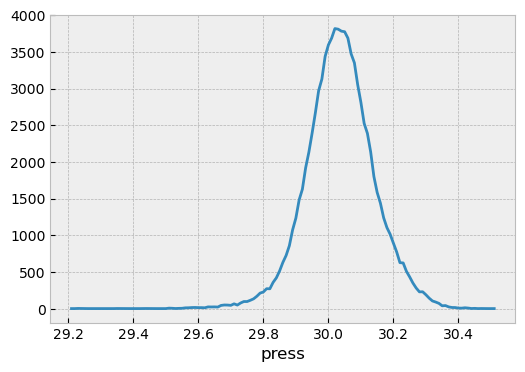

In [58]:
df_out['press'].map(conv_val).value_counts().sort_index().plot(figsize = (6,4))
df_out['press'].map(conv_msr).value_counts()

In [59]:
df_out2['temp']  = df_out2['temp'].map(conv_val)
df_out2['dewpt'] = df_out2['dewpt'].map(conv_val)
df_out2['press'] = df_out2['press'].map(conv_val)

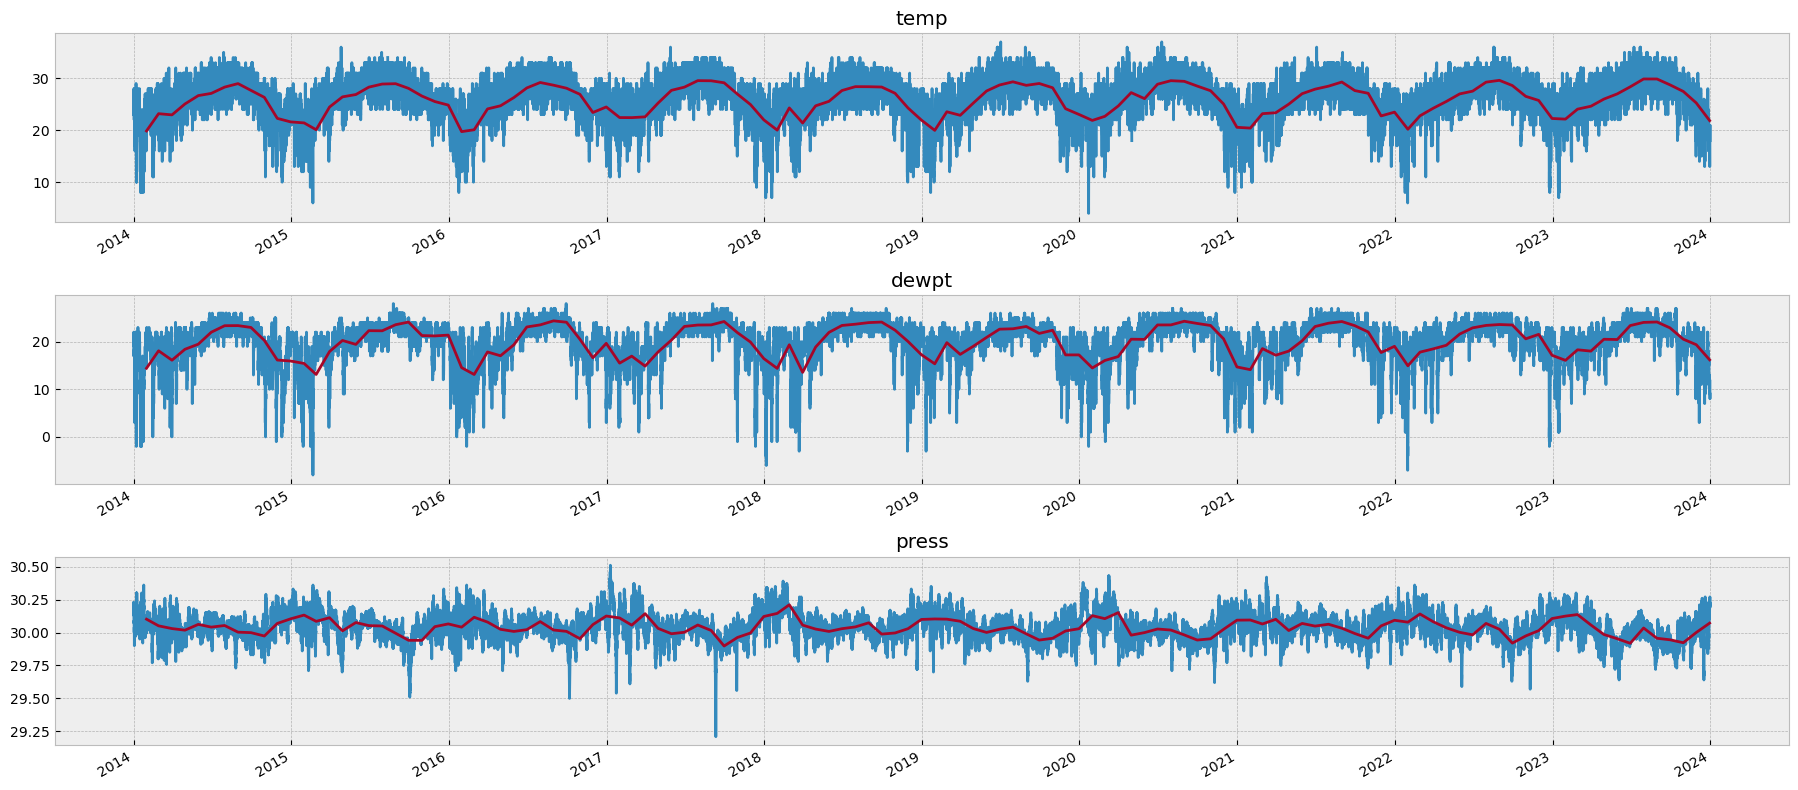

In [60]:
# plotting
i1 = 0
i2 = i1+24*3650

_, ax = plt.subplots(3,1, figsize = (18,8))
_ = df_out2.temp[i1:i2].plot(ax = ax[0], title = 'temp', xlabel = '')
_ = df_out2.temp[i1:i2].resample('M').mean().plot(ax = ax[0], xlabel = '')

_ = df_out2.dewpt[i1:i2].plot(ax = ax[1], title = 'dewpt', xlabel = '')
_ = df_out2.dewpt[i1:i2].resample('M').mean().plot(ax = ax[1], xlabel = '')

_ = df_out2.press[i1:i2].plot(ax = ax[2], title = 'press', xlabel = '')
_ = df_out2.press[i1:i2].resample('M').mean().plot(ax = ax[2], xlabel = '')

plt.tight_layout()

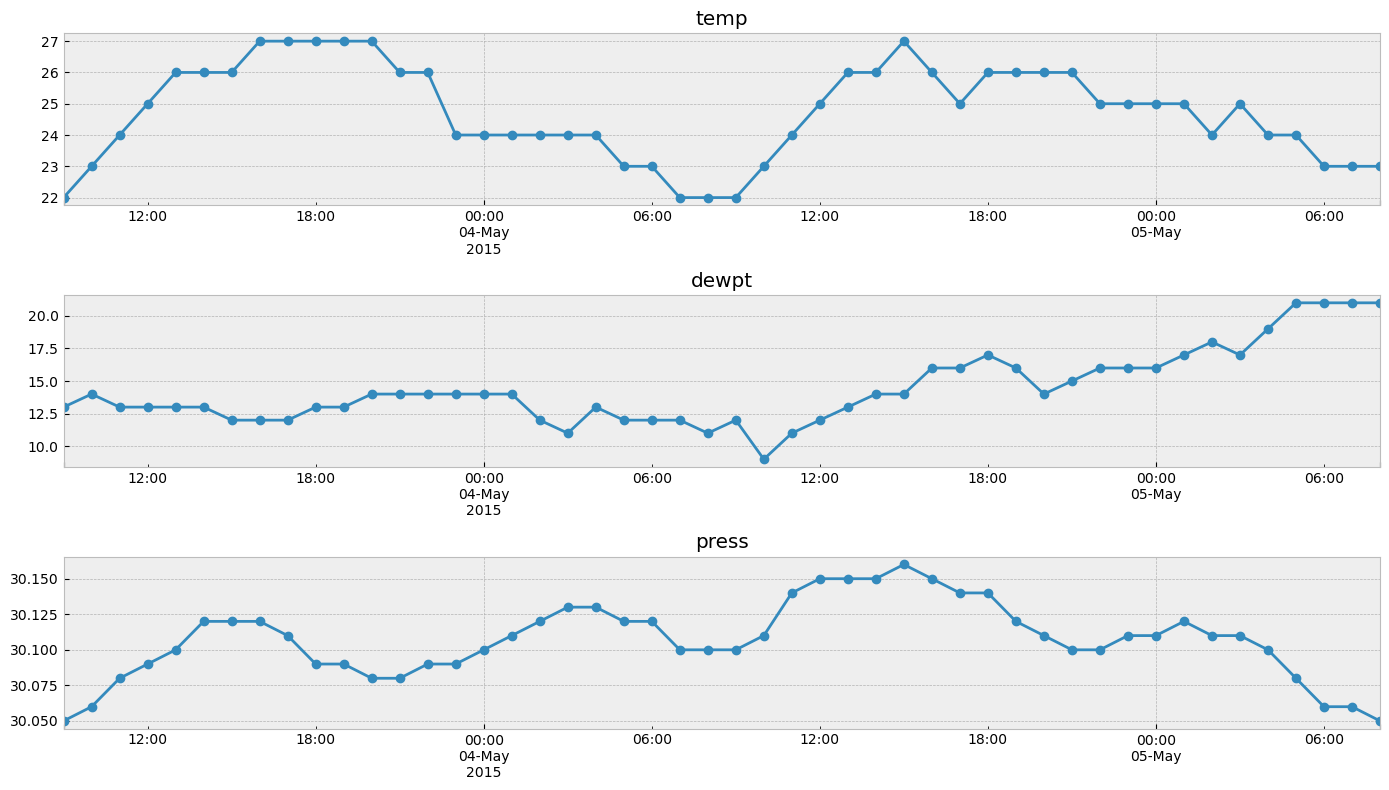

In [61]:
# random plotting
i1 = np.random.randint(0,df_out2.shape[0])
i2 = i1+24*2

_, ax = plt.subplots(3,1, figsize = (14,8))
_ = df_out2.temp[i1:i2].plot(ax = ax[0], title = 'temp', xlabel = '', style = 'o-')
_ = df_out2.dewpt[i1:i2].plot(ax = ax[1], title = 'dewpt', xlabel = '', style = 'o-')
_ = df_out2.press[i1:i2].plot(ax = ax[2], title = 'press', xlabel = '', style = 'o-')
plt.tight_layout()

#### runway

In [62]:
# unflat lists
def conv_list(df, feat):
    out1 = list()
    out2 = list()
    for _, r in df.iterrows():
        out1+=r[feat]
        out2+=[r.id1]*len(r[feat])
    df1 = pd.DataFrame(out1)
    df1['id1'] = out2
    return df1

In [63]:
f1 = df_out2['runway'].map(len) > 0
df_out3 = df_out2[f1][['code','runway','id1']]

df_out4 = conv_list(df_out3, 'runway')
print(df_out4.shape)
df_out4[:3]

(538, 4)


,0,1,2,id1
0,09,5500 meters,greater than 6000 meters,21748
1,09,4000 meters,greater than 6000 meters,21794
2,09,4000 meters,greater than 6000 meters,21824


In [64]:
for f in df_out4.columns:
    print(df_out4[f].value_counts())

0
09    538
Name: count, dtype: int64
1
5500 meters    1
1800 meters    1
1800 meters    1
1600 meters    1
2800 meters    1
              ..
2000 meters    1
2800 meters    1
4000 meters    1
2600 meters    1
5000 meters    1
Name: count, Length: 538, dtype: int64
2
greater than 6000 meters    1
greater than 6000 meters    1
4000 meters                 1
2000 meters                 1
4000 meters                 1
                           ..
greater than 6000 meters    1
4000 meters                 1
greater than 6000 meters    1
greater than 6000 meters    1
greater than 6000 meters    1
Name: count, Length: 538, dtype: int64
id1
21748    1
67166    1
69003    1
69002    1
69001    1
        ..
47532    1
47513    1
47492    1
46891    1
87328    1
Name: count, Length: 538, dtype: int64


In [65]:
a,b = df_out4[1][0], df_out4[2][1]
a,b

(<metar.Datatypes.distance at 0x175a0844990>,
 <metar.Datatypes.distance at 0x175a086d850>)

In [66]:
a.value(), b.value()

(5500.0, 6000.0)

1
meters    538
Name: count, dtype: int64

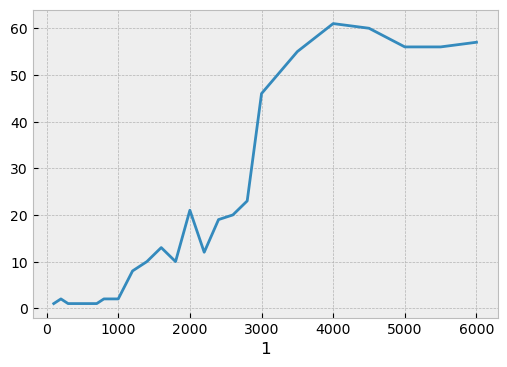

In [67]:
df_out4[1].map(conv_val).value_counts().sort_index().plot(figsize = (6,4))
df_out4[1].map(conv_msr).value_counts()

2
meters    538
Name: count, dtype: int64

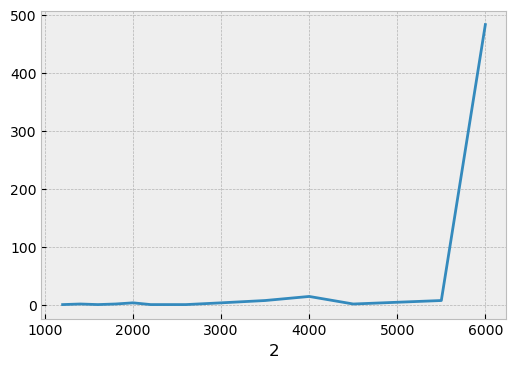

In [68]:
df_out4[2].map(conv_val).value_counts().sort_index().plot(figsize = (6,4))
df_out4[2].map(conv_msr).value_counts()

In [69]:
df_out4['vis_runway1'] = df_out4[1].map(conv_val)
df_out4['vis_runway2'] = df_out4[2].map(conv_val)
df_out4

,0,1,2,id1,vis_runway1,vis_runway2
0,09,5500 meters,greater than 6000 meters,21748,"5,500.00","6,000.00"
1,09,4000 meters,greater than 6000 meters,21794,"4,000.00","6,000.00"
2,09,4000 meters,greater than 6000 meters,21824,"4,000.00","6,000.00"
3,09,4000 meters,greater than 6000 meters,21863,"4,000.00","6,000.00"
4,09,5500 meters,greater than 6000 meters,21864,"5,500.00","6,000.00"
...,...,...,...,...,...,...
533,09,4000 meters,greater than 6000 meters,87053,"4,000.00","6,000.00"
534,09,2600 meters,greater than 6000 meters,87277,"2,600.00","6,000.00"
535,09,1600 meters,2000 meters,87294,"1,600.00","2,000.00"
536,09,6000 meters,greater than 6000 meters,87326,"6,000.00","6,000.00"


In [70]:
df_out4.id1.nunique()

538

In [71]:
df_out2.shape

(87408, 14)

In [72]:
df_out2 = df_out2.reset_index().merge(df_out4[['id1','vis_runway1','vis_runway2']], how = 'left', on = 'id1').set_index('time')
print(df_out2.shape)
df_out2[:3]

(87408, 16)


,code,wind_dir,wind_speed,wind_gust,vis,temp,dewpt,press,runway,weather,sky,time_diff,id1,wind_diff,vis_runway1,vis_runway2
time,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021,40.00,9.00,15.00,10.00,23.00,18.00,30.21,[],[],"[(OVC, 2500 feet, None)]",NaN,0,6.00,NaN,NaN
2014-01-01 01:00:00,KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A3021,40.00,9.00,15.00,10.00,23.00,18.00,30.21,[],[],"[(OVC, 2300 feet, None)]",1.00,1,6.00,NaN,NaN
2014-01-01 02:00:00,KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 A3023,50.00,9.00,19.00,10.00,23.00,18.00,30.23,[],"[(-, None, RA, None, None)]","[(OVC, 2500 feet, None)]",1.00,2,10.00,NaN,NaN


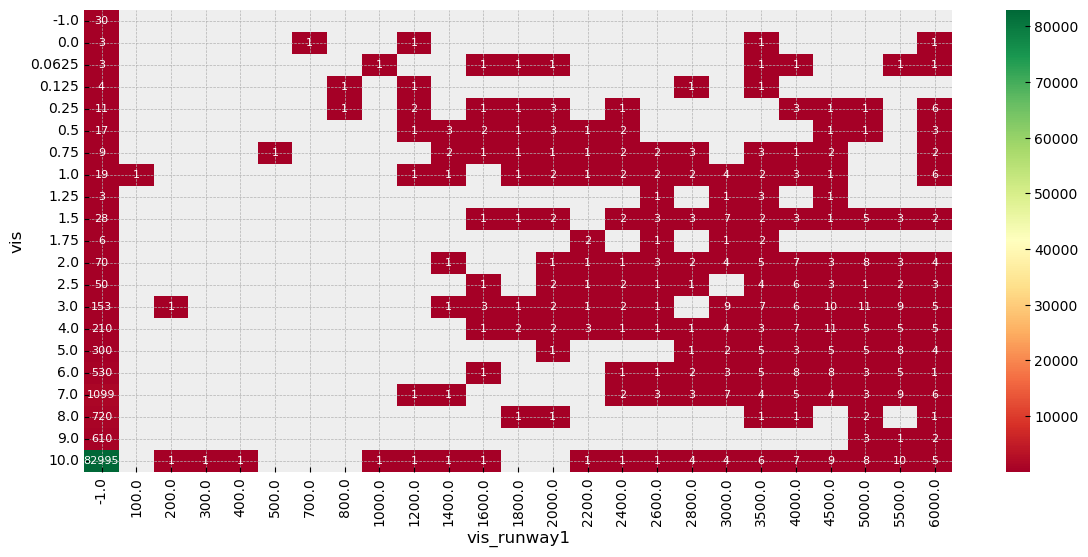

In [73]:
# 'vis','vis_runway1'
df_corr = df_out2.fillna(-1).groupby(['vis','vis_runway1']).size().unstack()

_, ax = plt.subplots(figsize = (14,6))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.0f', annot_kws={"size": 8})

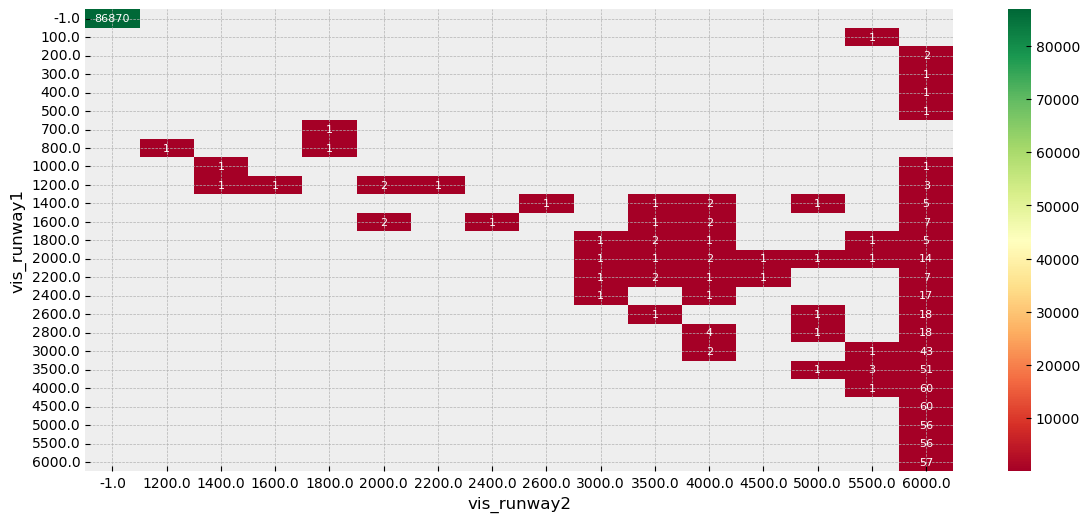

In [74]:
# 'vis','vis_runway1'
df_corr = df_out2.fillna(-1).groupby(['vis_runway1','vis_runway2']).size().unstack()

_, ax = plt.subplots(figsize = (14,6))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.0f', annot_kws={"size": 8})

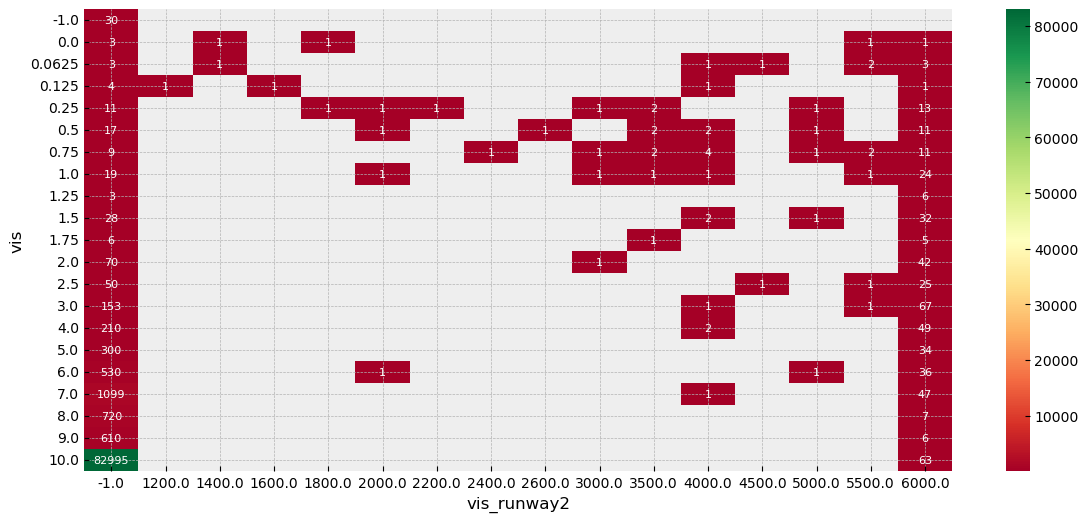

In [75]:
# 'vis','vis_runway1'
df_corr = df_out2.fillna(-1).groupby(['vis','vis_runway2']).size().unstack()

_, ax = plt.subplots(figsize = (14,6))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.0f', annot_kws={"size": 8})

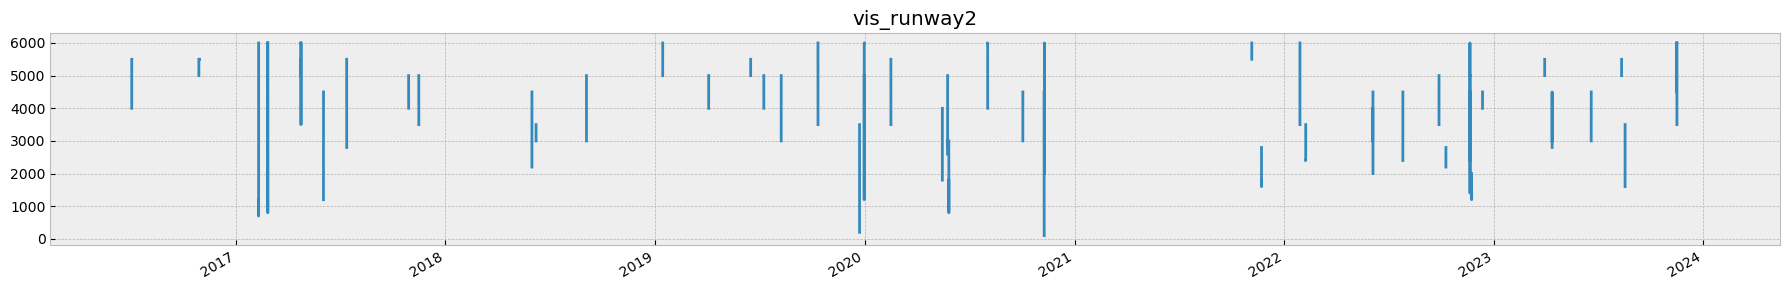

In [76]:
# plotting
i1 = 0
i2 = i1+24*3650

_, ax = plt.subplots(1,1, figsize = (18,3))
_ = df_out2.vis_runway1[i1:i2].plot(ax = ax, title = 'vis_runway2', xlabel = '')

plt.tight_layout()

#### weather

In [78]:
f1 = df_out2['weather'].map(len) > 0
df_out3 = df_out2[f1][['code','weather','id1']]

df_out4 = conv_list(df_out3, 'weather')
print(df_out4.shape)
df_out4[:3]

(7056, 6)


,0,1,2,3,4,id1
0,-,None,RA,None,None,2
1,-,None,RA,None,None,5
2,-,None,RA,None,None,8


In [79]:
for f in df_out4.columns:
    print(df_out4[f].value_counts())

0
-     3493
      2784
+      398
VC     381
Name: count, dtype: int64
1
TS    1951
MI       1
BC       1
Name: count, dtype: int64
2
RA    4306
      2747
DZ       2
//       1
Name: count, dtype: int64
3
BR    1401
FG      80
HZ      39
FU      29
Name: count, dtype: int64
4
FC    2
Name: count, dtype: int64
id1
68915    3
37764    3
30002    3
50024    3
38237    3
        ..
32262    1
32261    1
32260    1
32259    1
87331    1
Name: count, Length: 5947, dtype: int64


In [80]:
df_out4['weather_rain'] = 0
df_out4.loc[(df_out4[0] == '-')&(df_out4[2].isin(['RA','DZ'])), 'weather_rain'] = 1
df_out4.loc[(df_out4[0] == '') &(df_out4[2].isin(['RA','DZ'])), 'weather_rain'] = 2
df_out4.loc[(df_out4[0] == '+')&(df_out4[2].isin(['RA','DZ'])), 'weather_rain'] = 3
df_out4['weather_rain_flg'] = (df_out4['weather_rain'] > 0).astype(int)

df_out4['weather_thunderstorms'] = 0
df_out4.loc[(df_out4[1] == 'TS'), 'weather_thunderstorms'] = 1

df_out4['weather_fog'] = 0
df_out4.loc[(df_out4[3].isin(['BR'])), 'weather_fog'] = 1
df_out4.loc[(df_out4[3].isin(['HZ'])), 'weather_fog'] = 2
df_out4.loc[(df_out4[3].isin(['FG'])), 'weather_fog'] = 3
df_out4.loc[(df_out4[3].isin(['FU'])), 'weather_fog'] = 4
df_out4['weather_fog_flg'] = (df_out4['weather_fog'] > 0).astype(int)

In [81]:
feats1 = ['weather_rain', 'weather_rain_flg', 'weather_thunderstorms', 'weather_fog', 'weather_fog_flg']
df_out5 = df_out4.groupby('id1')[feats1].max().reset_index()
print(df_out5.shape)
df_out5[:5]

(5947, 6)


,id1,weather_rain,weather_rain_flg,weather_thunderstorms,weather_fog,weather_fog_flg
0,2,1,1,0,0,0
1,5,1,1,0,0,0
2,8,1,1,0,0,0
3,89,1,1,0,0,0
4,140,1,1,0,0,0


In [82]:
feats1 = ['id1', 'weather_rain', 'weather_thunderstorms', 'weather_fog']
df_out2 = df_out2.reset_index().merge(df_out5[feats1], how = 'left', on = 'id1').set_index('time')
print(df_out2.shape)
df_out2[:3]

(87408, 19)


,code,wind_dir,wind_speed,wind_gust,vis,temp,dewpt,press,runway,weather,sky,time_diff,id1,wind_diff,vis_runway1,vis_runway2,weather_rain,weather_thunderstorms,weather_fog
time,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021,40.00,9.00,15.00,10.00,23.00,18.00,30.21,[],[],"[(OVC, 2500 feet, None)]",NaN,0,6.00,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A3021,40.00,9.00,15.00,10.00,23.00,18.00,30.21,[],[],"[(OVC, 2300 feet, None)]",1.00,1,6.00,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 A3023,50.00,9.00,19.00,10.00,23.00,18.00,30.23,[],"[(-, None, RA, None, None)]","[(OVC, 2500 feet, None)]",1.00,2,10.00,NaN,NaN,1.00,0.00,0.00


In [83]:
df_out2['weather_rain'].fillna(0, inplace = True)
df_out2['weather_thunderstorms'].fillna(0, inplace = True)
df_out2['weather_fog'].fillna(0, inplace = True)

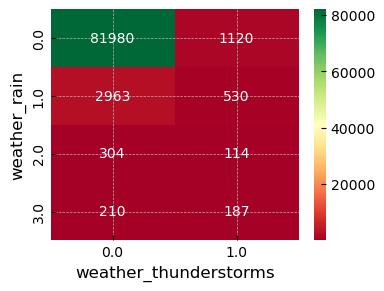

In [84]:
# pivot
df_corr = df_out2.fillna(-1).groupby(['weather_rain','weather_thunderstorms']).size().unstack()

_, ax = plt.subplots(figsize = (4,3))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.0f', annot_kws={"size": 10})

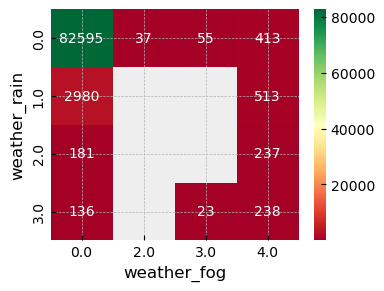

In [85]:
# pivot
df_corr = df_out2.fillna(-1).groupby(['weather_rain','weather_fog']).size().unstack()

_, ax = plt.subplots(figsize = (4,3))
_ = sns.heatmap(df_corr, ax = ax, cmap = 'RdYlGn', annot = True, fmt = '.0f', annot_kws={"size": 10})

#### sky

In [109]:
f1 = df_out2['sky'].map(len) > 0
df_out3 = df_out2[f1][['code','sky','id1']]

df_out4 = conv_list(df_out3, 'sky')
print(df_out4.shape)
df_out4[:3]

(198008, 4)


,0,1,2,id1
0,OVC,2500 feet,None,0
1,OVC,2300 feet,None,1
2,OVC,2500 feet,None,2


In [110]:
for f in df_out4.columns:
    print(df_out4[f].value_counts())

0
BKN    62062
FEW    61369
SCT    56806
OVC    12812
CLR     4908
VV        51
Name: count, dtype: int64
1
2500 feet     1
2500 feet     1
11000 feet    1
25000 feet    1
2500 feet     1
             ..
16000 feet    1
25000 feet    1
1000 feet     1
14000 feet    1
25000 feet    1
Name: count, Length: 193100, dtype: int64
2
CB     4416
TCU    1544
Name: count, dtype: int64
id1
66567    6
83168    5
39271    5
44347    5
30038    5
        ..
45865    1
45842    1
45841    1
45817    1
87407    1
Name: count, Length: 87368, dtype: int64


In [111]:
f1 = ~df_out4[2].isnull()
df_out4[f1]

,0,1,2,id1
284,SCT,3000 feet,CB,139
288,SCT,3000 feet,CB,140
1564,SCT,2500 feet,TCU,836
1576,BKN,1700 feet,TCU,840
1652,SCT,3000 feet,TCU,881
...,...,...,...,...
195969,SCT,2200 feet,CB,86512
195972,SCT,2500 feet,CB,86513
195975,FEW,2500 feet,CB,86514
196044,SCT,2600 feet,CB,86539


In [112]:
df_out4.isnull().sum()

0           0
1        4908
2      192048
id1         0
dtype: int64

In [113]:
df_out4[1].map(conv_msr).value_counts().sort_index()

1
feet    193100
Name: count, dtype: int64

In [114]:
df_out4[1] = df_out4[1].map(conv_val).fillna(0)

In [131]:
# df_out4[1].value_counts().sort_index()

In [115]:
df_out4[2] = df_out4[2].fillna('')

In [133]:
df_out4.isnull().sum()

0      0
1      0
2      0
id1    0
dtype: int64

In [134]:
df_out4.groupby([0,2]).size()

0    2  
BKN         60661
     CB      1113
     TCU      288
CLR          4908
FEW         60027
     CB       894
     TCU      448
OVC         12778
     CB        34
SCT         53623
     CB      2375
     TCU      808
VV             51
dtype: int64

In [149]:
df_out4#[2].value_counts()

,0,1,2,id1
0,OVC,"2,500.00",,0
1,OVC,"2,300.00",,1
2,OVC,"2,500.00",,2
3,OVC,"2,800.00",,3
4,OVC,"2,800.00",,4
...,...,...,...,...
198003,FEW,"25,000.00",,87403
198004,FEW,"25,000.00",,87404
198005,FEW,"25,000.00",,87405
198006,CLR,0.00,,87406


In [163]:
df_out4[0].value_counts()

0
BKN    62062
FEW    61369
SCT    56806
OVC    12812
CLR     4908
VV        51
Name: count, dtype: int64

In [164]:
df_out4[2].value_counts()

2
       192048
CB       4416
TCU      1544
Name: count, dtype: int64

In [156]:
df_out5 = pd.concat([df_out4[['id1',0,1]].rename(columns = {0:'var'}), df_out4[['id1',2,1]].rename(columns = {2:'var'}) ])
df_out5

,id1,var,1
0,0,OVC,"2,500.00"
1,1,OVC,"2,300.00"
2,2,OVC,"2,500.00"
3,3,OVC,"2,800.00"
4,4,OVC,"2,800.00"
...,...,...,...
198003,87403,,"25,000.00"
198004,87404,,"25,000.00"
198005,87405,,"25,000.00"
198006,87406,,0.00


In [162]:
df_out5['var'].value_counts()

var
       192048
BKN     62062
FEW     61369
SCT     56806
OVC     12812
CLR      4908
CB       4416
TCU      1544
VV         51
Name: count, dtype: int64

In [157]:
df1 = df_out5.groupby(['id1', 'var']).size().unstack().fillna(0)
cols = df1.columns
df1.columns = ['sky_cnt_' + c for c in cols]
df1

,sky_cnt_,sky_cnt_BKN,sky_cnt_CB,sky_cnt_CLR,sky_cnt_FEW,sky_cnt_OVC,sky_cnt_SCT,sky_cnt_TCU,sky_cnt_VV
id1,,,,,,,,,
0,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
87403,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
87404,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
87405,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [139]:
# df1 = df_out4.groupby(['id1',2,0]).size().unstack().unstack().fillna(0)
# cols = df1.columns
# df1.columns = ['sky_cnt_' + '_'.join(c) for c in cols]
# df1

In [158]:
pd.melt(df1.reset_index(),id_vars = 'id1').groupby(['variable','value']).size().unstack()

value,0.00,1.00,2.00,3.00,4.00,5.00,6.00
variable,,,,,,,
sky_cnt_,104.00,"23,298.00","30,872.00","25,572.00","7,321.00",200.00,1.00
sky_cnt_BKN,"44,282.00","27,705.00","12,004.00","3,160.00",216.00,1.00,NaN
sky_cnt_CB,"82,952.00","4,416.00",NaN,NaN,NaN,NaN,NaN
sky_cnt_CLR,"82,460.00","4,908.00",NaN,NaN,NaN,NaN,NaN
sky_cnt_FEW,"40,455.00","33,294.00","12,786.00",829.00,4.00,NaN,NaN
sky_cnt_OVC,"74,557.00","12,810.00",1.00,NaN,NaN,NaN,NaN
sky_cnt_SCT,"44,146.00","31,568.00","9,775.00","1,828.00",51.00,NaN,NaN
sky_cnt_TCU,"85,824.00","1,544.00",NaN,NaN,NaN,NaN,NaN
sky_cnt_VV,"87,317.00",51.00,NaN,NaN,NaN,NaN,NaN


In [160]:
df1 = df_out5.groupby(['id1', 'var'])[1].mean().unstack().fillna(0)
cols = df1.columns
df1.columns = ['sky_avg_' + c for c in cols]
df1

,sky_avg_,sky_avg_BKN,sky_avg_CB,sky_avg_CLR,sky_avg_FEW,sky_avg_OVC,sky_avg_SCT,sky_avg_TCU,sky_avg_VV
id1,,,,,,,,,
0,"2,500.00",0.00,0.00,0.00,0.00,"2,500.00",0.00,0.00,0.00
1,"2,300.00",0.00,0.00,0.00,0.00,"2,300.00",0.00,0.00,0.00
2,"2,500.00",0.00,0.00,0.00,0.00,"2,500.00",0.00,0.00,0.00
3,"2,800.00",0.00,0.00,0.00,0.00,"2,800.00",0.00,0.00,0.00
4,"2,800.00",0.00,0.00,0.00,0.00,"2,800.00",0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
87403,"25,000.00",0.00,0.00,0.00,"25,000.00",0.00,0.00,0.00,0.00
87404,"25,000.00",0.00,0.00,0.00,"25,000.00",0.00,0.00,0.00,0.00
87405,"25,000.00",0.00,0.00,0.00,"25,000.00",0.00,0.00,0.00,0.00
